### New Way to Fetch ARGO DATA by INDEX + Erddap Data Fetcher (FIXED ERRORS! For SMILE Data)

In [1]:
import xarray as xr
xr.set_options(display_style="html", display_expand_attrs=False);
from matplotlib import pyplot as plt
plt.style.use('default')
import cartopy
import cartopy.crs as ccrs
import argopy

In [3]:
from argopy import IndexFetcher as ArgoIndexFetcher
idx = ArgoIndexFetcher(src='erddap').region([-147, -138, 24, 36, '1999-01-01', '2023-01-01']).load()
idx.index

,file,date,longitude,latitude,ocean,profiler_code,institution_code,date_update,wmo,institution,profiler
0,meds/4900123/profiles/D4900123_014.nc,2002-07-10 15:23:00,-144.814,35.887,P,846,ME,2015-11-30 20:11:20,4900123,"MEDS, Canada","Webb Research, Seabird sensor"
1,meds/4900123/profiles/D4900123_015.nc,2002-07-20 16:19:00,-144.852,35.828,P,846,ME,2015-11-30 20:11:20,4900123,"MEDS, Canada","Webb Research, Seabird sensor"
2,aoml/4900091/profiles/D4900091_001.nc,2002-07-30 06:57:32,-139.865,31.747,P,846,AO,2020-05-06 14:47:23,4900091,"AOML, USA","Webb Research, Seabird sensor"
3,meds/4900123/profiles/D4900123_016.nc,2002-07-30 15:41:00,-144.813,35.743,P,846,ME,2015-11-30 20:11:20,4900123,"MEDS, Canada","Webb Research, Seabird sensor"
4,aoml/4900092/profiles/D4900092_001.nc,2002-07-30 19:05:15,-143.786,29.850,P,846,AO,2015-03-13 14:15:24,4900092,"AOML, USA","Webb Research, Seabird sensor"
...,...,...,...,...,...,...,...,...,...,...,...
10062,aoml/4902947/profiles/R4902947_198.nc,2022-12-29 06:31:22,-143.928,27.566,P,863,AO,2023-02-06 19:02:25,4902947,"AOML, USA",Navis-A Float
10063,jma/4902149/profiles/R4902149_300.nc,2022-12-29 10:18:50,-143.797,35.960,P,863,JA,2022-12-30 01:29:01,4902149,"JMA, Japan",Navis-A Float
10064,aoml/5905271/profiles/R5905271_183.nc,2022-12-30 01:28:55,-141.778,24.003,P,853,AO,2023-02-27 20:03:22,5905271,"AOML, USA","Solo2, Seabird conductivity sensor"
10065,aoml/5906178/profiles/R5906178_099.nc,2022-12-30 11:05:11,-140.338,28.095,P,863,AO,2022-12-30 12:01:05,5906178,"AOML, USA",Navis-A Float


In [4]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(src='erddap', parallel=True) #This limits the data to the highest quality control flag (QC = 1)
argo_loader

<datafetcher.erddap> 'No access point initialised'
Available access points: float, profile, region
Performances: cache=False, parallel=True
User mode: standard
Dataset: phy

(<Figure size 900x540 with 1 Axes>,
 <GeoAxes: xlabel='longitude', ylabel='latitude'>)

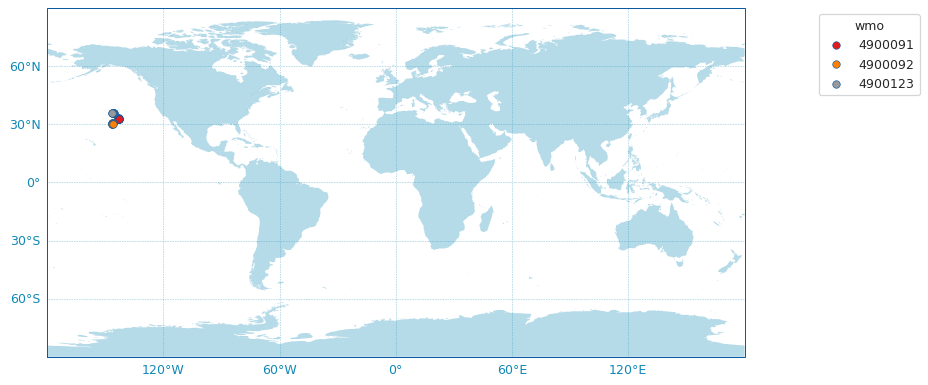

In [7]:
argo_loader.region([-147, -138, 24, 36, 0, 10000, '1999-01', '2023-01']).load() 
argo_loader
argo_loader.plot('trajectory', set_global=True)

In [8]:
argo_loader.domain

[-146.339004516602,
 -142.764007568359,
 30.2070007324219,
 35.77299880981445,
 4.0,
 496.6,
 numpy.datetime64('2003-09-03T15:46:00.000000000'),
 numpy.datetime64('2003-11-22T16:34:00.000000000')]

(<Figure size 900x540 with 1 Axes>,
 <GeoAxes: xlabel='longitude', ylabel='latitude'>)

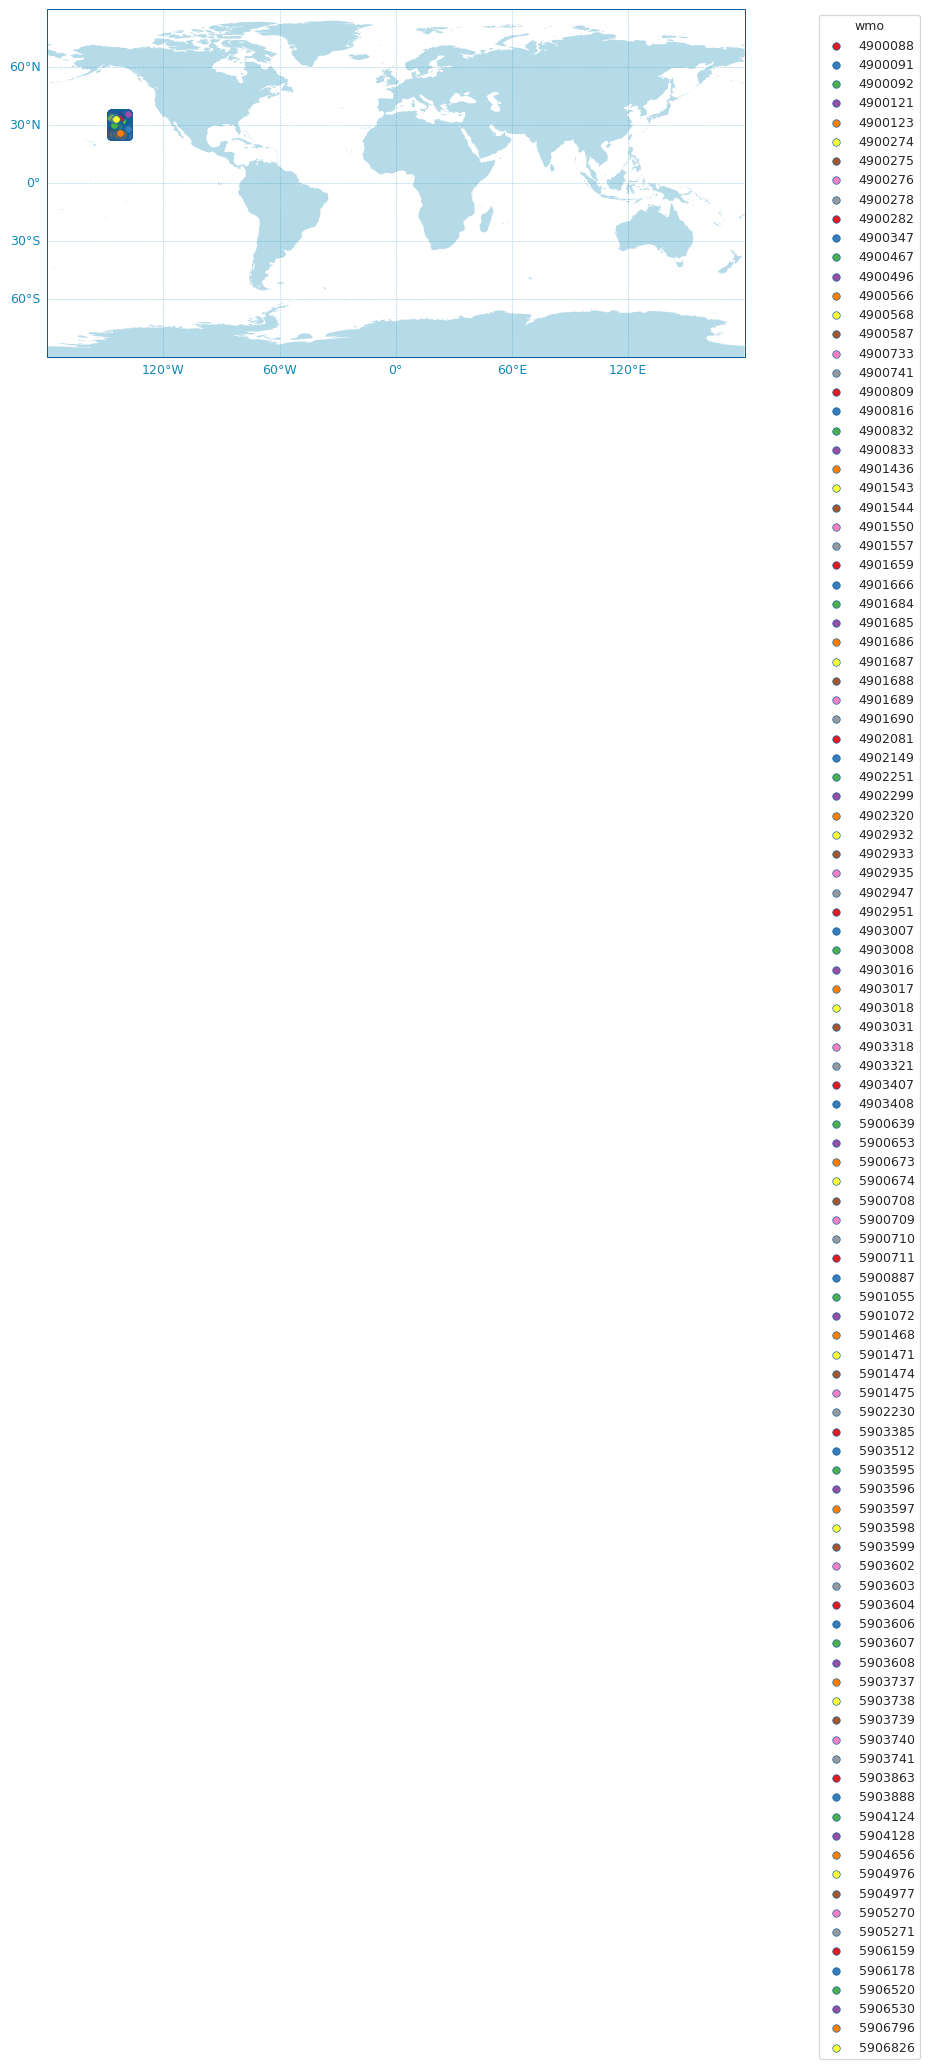

In [11]:
argo_loader.region([-147, -138, 24, 36, 0, 10000]).load() 
argo_loader
argo_loader.plot('trajectory', set_global=True)

In [13]:
#Better, because now it has the inactive floats. But it is still missing 3901156 and 4903012.

In [12]:
argo_loader.domain

[-146.999,
 -138.0,
 24.00034,
 36.0,
 0.88,
 2095.62,
 numpy.datetime64('2002-07-10T15:23:00.000000000'),
 numpy.datetime64('2023-07-13T06:52:59.000000000')]